# MROOM hackathon group M
Library import

In [1]:
import pandas as pd # Data frames (for storing data)
import numpy as np # Scientific computing
from sklearn.model_selection import train_test_split # Data split function
import statsmodels.api as sm # Logistic regression
from sklearn.metrics import accuracy_score # Accuracy score
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import mean_squared_error # RMSE
from sklearn.metrics import r2_score # R2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns 
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

from math import exp

In [2]:
# sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Decision Tree algorithm
from sklearn.preprocessing import LabelEncoder # OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler # Random Forest data preprocessing 
from sklearn.ensemble import RandomForestClassifier # R Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.neural_network import MLPClassifier #Neural network
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.model_selection import GridSearchCV

# Decision tree plot
import pydotplus
from IPython.display import Image
from IPython.display import HTML, display
from sklearn.tree import plot_tree

import itertools

## Data cleaning

In [3]:
df=pd.read_csv('hackathon_data.csv', dtype={25:str})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044226 entries, 0 to 1044225
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   receipt_row_id     1044226 non-null  int64  
 1   employee_id        1044226 non-null  int64  
 2   price              1044226 non-null  float64
 3   amount             1044226 non-null  int64  
 4   vat                1041737 non-null  float64
 5   discount           1044226 non-null  int64  
 6   row_type           3957 non-null     object 
 7   campaign_id        75483 non-null    float64
 8   campaign_discount  61265 non-null    float64
 9   receipt_id         1044226 non-null  int64  
 10  receipt_created    1044226 non-null  object 
 11  customer_id        909905 non-null   float64
 12  membership_id      272738 non-null   float64
 13  membership_type    1044226 non-null  object 
 14  product_id         1040270 non-null  float64
 15  product_name       1040270 non-n

In [5]:
# Process columns that contain dates

date_columns = ['receipt_created','added','serviced','finished','wait_estimate']
for column in date_columns:
    # Some zeros in the data. Replace with np.nan to ignore them in subsequent analyses
    df[column] = df[column].replace("0",np.nan) 
    df[column] = pd.to_datetime(df[column], format='%d.%m.%Y %H.%M.%S')
df[['receipt_created','added','serviced','finished','wait_estimate']].describe()

,receipt_created,added,serviced,finished,wait_estimate
count,1044226,994534,994532,994534,860214
mean,2023-01-07 00:05:51.240631296,2023-01-10 00:09:23.247459072,2023-01-10 00:38:53.529728,2023-01-10 01:21:36.108141824,2023-02-22 03:30:33.906563072
min,2022-01-01 08:42:58,2022-01-02 12:00:27,2022-01-02 12:00:29,2022-01-02 12:29:54,2022-03-24 14:53:00
25%,2022-07-09 12:29:27,2022-07-14 17:20:58,2022-07-14 17:49:57.249999872,2022-07-14 18:21:26.249999872,2022-09-14 15:54:30
50%,2023-01-07 12:46:42,2023-01-13 10:26:09.500000,2023-01-13 10:51:11.500000,2023-01-13 11:26:40.500000,2023-02-26 15:39:30
75%,2023-07-07 09:24:06.500000,2023-07-08 09:44:08,2023-07-08 10:09:05,2023-07-08 10:46:29,2023-07-29 10:34:00
max,2023-12-31 17:38:55,2023-12-31 15:58:46,2023-12-31 17:03:25,2024-01-06 13:09:17,2023-12-31 17:18:00


In [6]:
def tier_consolidation(df: pd.DataFrame):

    conditions = [
        df['membership_type'].str.contains("platinum", case = False),
        df['membership_type'].str.contains("gold", case = False),
        df['membership_type'].str.contains("silver", case = False),
        df['membership_type'].str.contains("white", case = False),
        df['membership_type'].str.contains("none", case = False),
    ]

    membership_condensated = [
        "platinum",
        "gold",
        "silver",
        "white",
        "none"
    ]

    df['membership_condensated'] = np.select(conditions, membership_condensated, default="nonmember")  
   
    return df

In [7]:
# Consolidate membership tier data
# Print some things to check it works OK

df = tier_consolidation(df)
df[['membership_type','membership_condensated']]
print("Checking the consolidation")
print(df.groupby(['membership_type','membership_condensated']).size())
print("Membership-tier distribution")
print(df.groupby(['membership_condensated']).size()/len(df))
print("Members")
df['is_member'] = np.where(df['membership_condensated'] == 'nonmember', False, True)
print(df.groupby("is_member").size())

Checking the consolidation
membership_type                membership_condensated
Cyber Monday Silver -23        silver                        65
Ei voimassa olevaa jäsenyyttä  nonmember                 771491
GOLD                           gold                           1
Gold                           gold                       24696
Gold 15                        gold                        1505
Gold 18                        gold                         144
Gold 20                        gold                        8121
Platinum                       platinum                    3008
Platinum 25                    platinum                     772
Silver                         silver                    200025
Silver 10                      silver                     14934
Silver 10 BF                   silver                     15712
Silver 10 Daytime              silver                      3704
White                          white                         48
dtype: int64
Membership

In [8]:
df.head()

,receipt_row_id,employee_id,price,amount,vat,discount,row_type,campaign_id,campaign_discount,receipt_id,...,row_total,hour,product_category,queue_id,added,serviced,finished,wait_estimate,membership_condensated,is_member
0,5793884,778136,33.0,1,24.0,0,NaN,NaN,NaN,4653670,...,33.0,12,Service,3486708.0,2022-01-02 12:00:27,2022-01-02 12:00:29,2022-01-02 12:29:54,NaT,nonmember,False
1,5793885,793601,33.0,1,24.0,0,NaN,NaN,NaN,4653671,...,33.0,12,Service,3486709.0,2022-01-02 12:22:26,2022-01-02 12:22:28,2022-01-02 12:43:54,NaT,nonmember,False
2,5793886,778136,33.0,1,24.0,0,NaN,NaN,NaN,4653672,...,33.0,12,Service,3486710.0,2022-01-02 12:23:44,2022-01-02 12:31:25,2022-01-02 12:53:51,NaT,nonmember,False
3,5793887,793601,33.0,1,24.0,0,NaN,NaN,NaN,4653673,...,33.0,13,Service,3486711.0,2022-01-02 13:10:08,2022-01-02 13:10:10,2022-01-02 13:37:49,NaT,nonmember,False
4,5793888,778136,33.0,1,24.0,0,NaN,NaN,NaN,4653674,...,33.0,13,Service,3486712.0,2022-01-02 13:23:49,2022-01-02 13:23:52,2022-01-02 13:40:00,NaT,nonmember,False


In [9]:
df[df['wait_estimate'].isna() ==False]

,receipt_row_id,employee_id,price,amount,vat,discount,row_type,campaign_id,campaign_discount,receipt_id,...,row_total,hour,product_category,queue_id,added,serviced,finished,wait_estimate,membership_condensated,is_member
105533,5902198,678008,0.0,1,24.0,-100,NaN,NaN,NaN,4730987,...,0.0,15,Service,3568400.0,2022-03-24 14:53:00,2022-03-24 15:05:00,2022-03-24 15:31:35,2022-03-24 14:53:00,platinum,True
105534,5902199,678008,10.8,1,24.0,40,NaN,NaN,NaN,4730987,...,10.8,15,Product,3568400.0,2022-03-24 14:53:00,2022-03-24 15:05:00,2022-03-24 15:31:35,2022-03-24 14:53:00,platinum,True
105535,5902200,678008,14.4,1,24.0,40,NaN,NaN,NaN,4730987,...,14.4,15,Product,3568400.0,2022-03-24 14:53:00,2022-03-24 15:05:00,2022-03-24 15:31:35,2022-03-24 14:53:00,platinum,True
106676,5903366,839901,33.0,1,24.0,0,NaN,NaN,NaN,4731862,...,33.0,12,Service,3569377.0,2022-03-25 12:01:00,2022-03-25 12:01:00,2022-03-25 12:28:06,2022-03-25 12:01:00,nonmember,False
110673,5907486,849402,0.0,1,24.0,-100,NaN,NaN,NaN,4734917,...,0.0,9,Service,3572522.0,2022-03-29 08:38:00,2022-03-29 09:01:09,2022-03-29 09:19:43,2022-03-29 09:00:00,silver,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044215,7006145,691888,0.0,1,24.0,100,NaN,NaN,NaN,5502767,...,0.0,13,Product,4246415.0,2023-12-05 16:25:49,2023-12-05 17:44:57,2024-01-06 13:01:41,2023-12-05 17:34:00,nonmember,False
1044216,7006146,820441,279.0,1,24.0,0,NaN,NaN,NaN,5502767,...,279.0,13,Membership,4246415.0,2023-12-05 16:25:49,2023-12-05 17:44:57,2024-01-06 13:01:41,2023-12-05 17:34:00,nonmember,False
1044219,7006162,887440,0.0,1,24.0,100,NaN,NaN,NaN,5502777,...,0.0,13,Service,4274080.0,2023-12-30 15:40:13,2023-12-30 16:06:31,2024-01-06 13:09:17,2023-12-30 16:09:00,silver,True
1044220,7006163,820441,279.0,1,24.0,0,NaN,NaN,NaN,5502777,...,279.0,13,Membership,4274080.0,2023-12-30 15:40:13,2023-12-30 16:06:31,2024-01-06 13:09:17,2023-12-30 16:09:00,nonmember,False


In [10]:
unique_values = df['receipt_row_id'].dropna().drop_duplicates().unique()
len(unique_values)

1044226

In [11]:
df['membership_type'].unique()

array(['Ei voimassa olevaa jäsenyyttä', 'Silver', 'Gold', 'Platinum',
       'White', 'Gold 18', 'Silver 10 BF', 'GOLD', 'Gold 20',
       'Silver 10 Daytime', 'Silver 10', 'Gold 15', 'Platinum 25',
       'Cyber Monday Silver -23 '], dtype=object)

In [12]:
df['product_category'].unique()

array(['Service', 'Product', 'Membership', 'Other'], dtype=object)

In [13]:
df['discount'].unique()

array([   0, -100,   10,   40,  -10,   20,   50,  100,   25,   15,  -40,
         30,  -20,   60,  -50,   75,   70,   80,   65,  -60,   17,   -9,
         12,  -70,    4,   35,   39,   19,   34,    5,  -35,   16,    8,
         11,  -17,  -15,  -30,   24,    3,   82,   13,  -16,   69,   -5,
         78,   18,   -4,    9,    2,   28,   23,   44,   42,    6,   14,
         33,   66,   26,    1,   45,   21,   27,  -78,   51,   47,   63,
         54,   64,   57,    7,   79,   95,   81,   56,   49,   36,   90,
         48,  -24,   38,   41,   29,   52,   59,   58,   83,   76,   22,
         53,   85,   73,   55,   43,   62,  -11,   97,   72,   88,  -43,
        -28,   32,  -41,   77,  -79,   71,   37,   31,   92,   -3,   61,
         -8,   67,   84,   -2,   99,  -25,   96,   74,   94,  -14,   46,
         86])

In [14]:
df['customer_id'].nunique()

95329

In [15]:
df_copy = df.dropna(subset=['customer_id', 'receipt_created'])

df_2022 = df_copy[df_copy['receipt_created'].dt.year.eq(2022)]

df_2023 = df_copy[df_copy['receipt_created'].dt.year.eq(2023)]

# Step 1: Get the set of unique customer IDs present in 2022
uniqueID = set(df_copy[df_copy['receipt_created'].dt.year.eq(2023)]['customer_id'])

# Step 2: Create a new column 'churn' and initialize it with False
df_copy['not_churn'] = False

# Step 3: Update 'churn' column based on existence in 2022 and 2023
df_copy.loc[df_copy['customer_id'].isin(uniqueID) , 'not_churn'] = True

/tmp/ipykernel_381/2853127693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['not_churn'] = False


In [16]:
df_copy['not_churn'].describe()

count     909905
unique         2
top         True
freq      842947
Name: not_churn, dtype: object

In [17]:
df_copy = df_copy[df_copy['receipt_created'].dt.year.eq(2022)]

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446955 entries, 3 to 561738
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   receipt_row_id          446955 non-null  int64         
 1   employee_id             446955 non-null  int64         
 2   price                   446955 non-null  float64       
 3   amount                  446955 non-null  int64         
 4   vat                     446779 non-null  float64       
 5   discount                446955 non-null  int64         
 6   row_type                188 non-null     object        
 7   campaign_id             24567 non-null   float64       
 8   campaign_discount       18452 non-null   float64       
 9   receipt_id              446955 non-null  int64         
 10  receipt_created         446955 non-null  datetime64[ns]
 11  customer_id             446955 non-null  float64       
 12  membership_id           143973 non-

In [53]:
df_copy['customer_id'].drop_duplicates(inplace = True)

In [54]:
df_copy['not_churn'].describe()

count     443706
unique         2
top         True
freq      377143
Name: not_churn, dtype: object

In [19]:
df_copy['expected_queue_time'] = (df_copy['wait_estimate']-df_copy['added']).dt.total_seconds()/60

# Assumption: negative wait times should be interpreted as zero
df_copy['expected_queue_time'] = df_copy['expected_queue_time'].where(df_copy['expected_queue_time']>0, 0)
# Assumption: wait times should be less than three hours
df_copy['expected_queue_time'] = df_copy['expected_queue_time'].where(df_copy['expected_queue_time']<60*3, np.nan)

df_copy.dropna(subset=['expected_queue_time'], inplace=True)

In [20]:
test = df_copy[['not_churn', 'price', 'discount','product_category','membership_condensated', 'expected_queue_time']]

In [21]:
test.head()

,not_churn,price,discount,product_category,membership_condensated,expected_queue_time
3,False,33.0,0,Service,nonmember,0.0
4,False,33.0,0,Service,nonmember,0.0
5,True,33.0,0,Service,nonmember,0.0
6,True,0.0,-100,Service,silver,0.0
7,True,33.0,0,Service,nonmember,0.0


In [22]:
test['discount(y/n)'] = test['discount'] != 0

/tmp/ipykernel_381/1271812749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['discount(y/n)'] = test['discount'] != 0


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443706 entries, 3 to 561738
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   not_churn               443706 non-null  bool   
 1   price                   443706 non-null  float64
 2   discount                443706 non-null  int64  
 3   product_category        443706 non-null  object 
 4   membership_condensated  443706 non-null  object 
 5   expected_queue_time     443706 non-null  float64
 6   discount(y/n)           443706 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(2)
memory usage: 21.2+ MB


In [24]:
test = test[['price','discount(y/n)','product_category','membership_condensated','expected_queue_time','not_churn']]

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443706 entries, 3 to 561738
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   443706 non-null  float64
 1   discount(y/n)           443706 non-null  bool   
 2   product_category        443706 non-null  object 
 3   membership_condensated  443706 non-null  object 
 4   expected_queue_time     443706 non-null  float64
 5   not_churn               443706 non-null  bool   
dtypes: bool(2), float64(2), object(2)
memory usage: 17.8+ MB


In [26]:
test = pd.get_dummies(test, columns = ["product_category", 'membership_condensated'], drop_first = True)
test = test*1
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443706 entries, 3 to 561738
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   price                             443706 non-null  float64
 1   discount(y/n)                     443706 non-null  int64  
 2   expected_queue_time               443706 non-null  float64
 3   not_churn                         443706 non-null  int64  
 4   product_category_Other            443706 non-null  int64  
 5   product_category_Product          443706 non-null  int64  
 6   product_category_Service          443706 non-null  int64  
 7   membership_condensated_nonmember  443706 non-null  int64  
 8   membership_condensated_platinum   443706 non-null  int64  
 9   membership_condensated_silver     443706 non-null  int64  
 10  membership_condensated_white      443706 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 40.6 MB


In [27]:
test['not_churn'].describe()

count    443706.000000
mean          0.849984
std           0.357088
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: not_churn, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

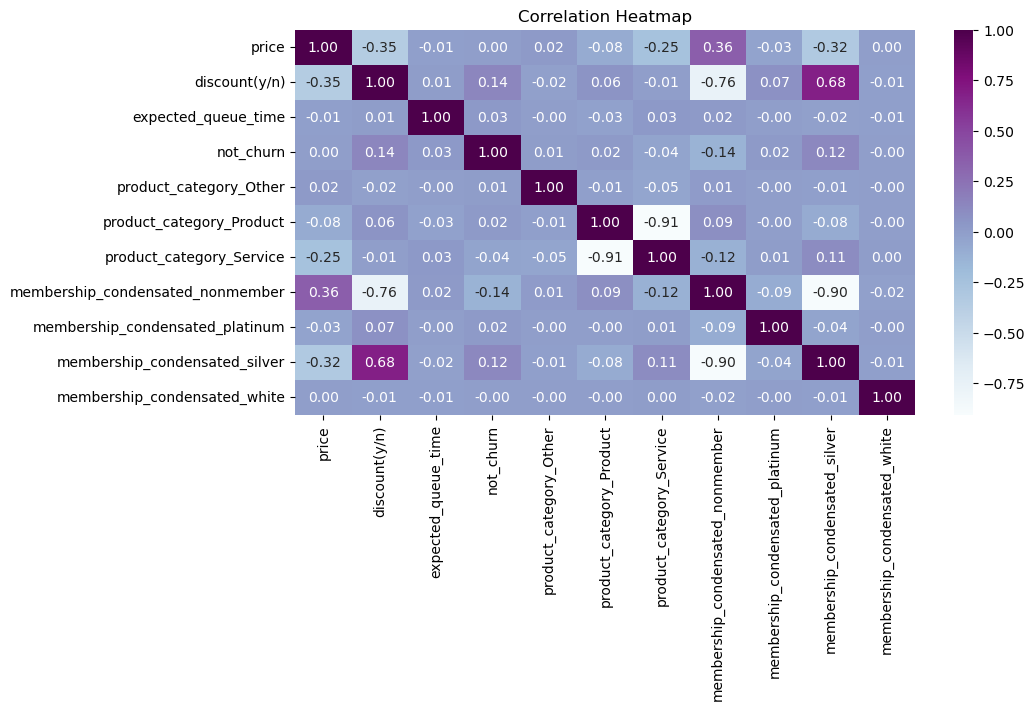

In [28]:
corr_point = test.select_dtypes("number").corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_point, annot=True, cmap='BuPu', fmt=".2f")
plt.title("Correlation Heatmap")

## Model running

### Train test split

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

predictors = test.drop(columns = 'not_churn').columns
# Split the data
X, y = test[predictors], test['not_churn'] # Define feature matrix X and labels y
X = sm.add_constant(X) # Add intercept
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the test data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [31]:
y_train_balance = y_train.value_counts()
print(y_train_balance)

not_churn
1    264005
0    264005
Name: count, dtype: int64


#### Decision tree

In [32]:
attr_tree1 = tree.DecisionTreeClassifier(min_samples_leaf = 10, max_leaf_nodes=20 ,max_depth = 5, random_state =0)
attr_tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=10,
                       random_state=0)

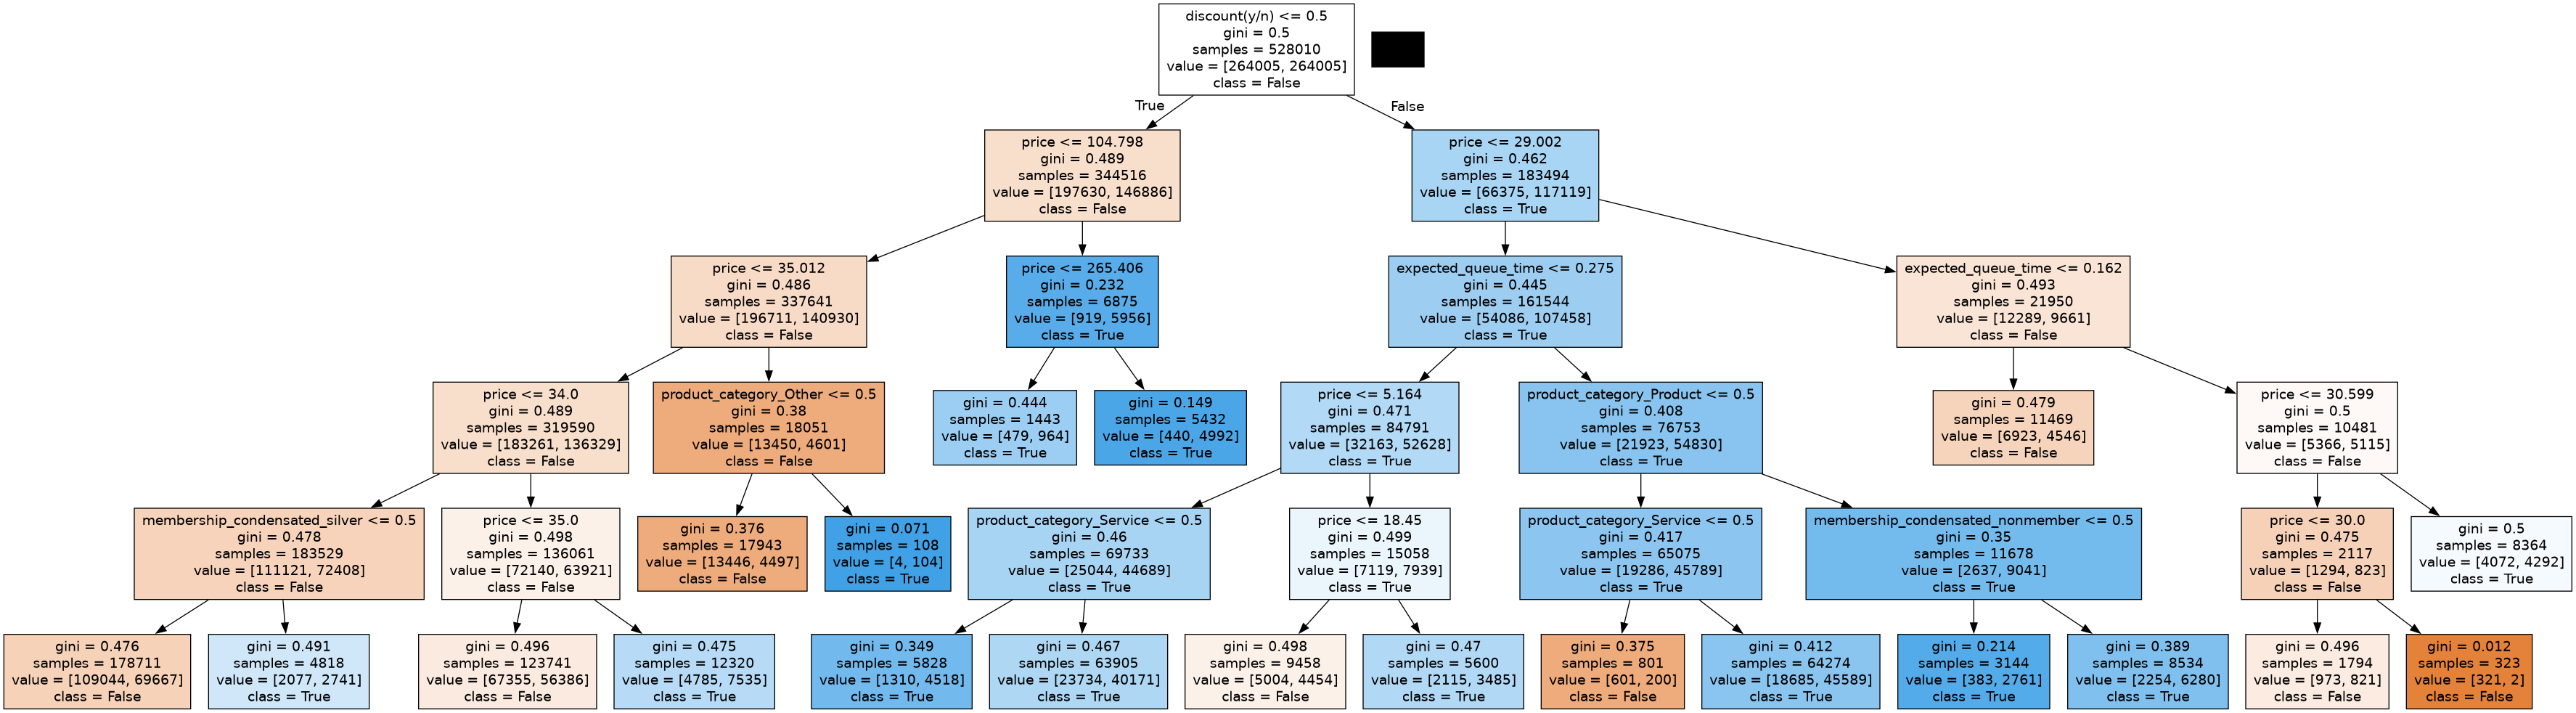

In [33]:
target_column = ['Test.Result'] 
names = list(set(list(X_test.columns)) - set(target_column))

# Create DOT data
dot_data = tree.export_graphviz(attr_tree1, out_file = None, 
                                feature_names = X_test.columns, 
                                class_names = ['False', 'True'], filled = True) 

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

In [34]:
attr_treePredict1 = attr_tree1.predict(X_test) # Use classifier to predict labels
attr_treePredict_probs1 = attr_tree1.predict_proba(X_test) # Probabilities
print ("Accuracy of decision tree model is:", (accuracy_score(y_test, attr_treePredict1)*100).round(2))

Accuracy of decision tree model is: 51.71


Text(0.5, 1.0, 'Accuracy of Decision tree: 0.5171284331991105')

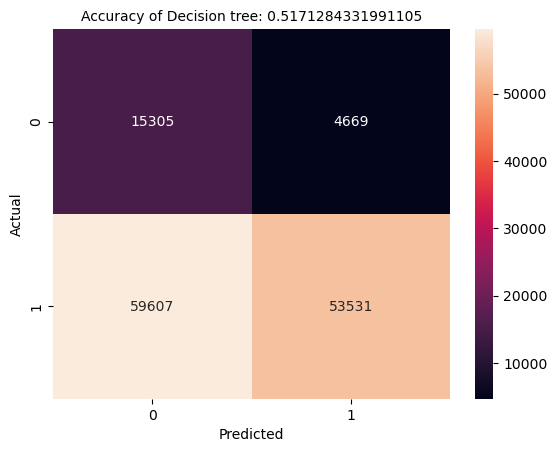

In [35]:
confusion_matrix = pd.crosstab(y_test, attr_treePredict1, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True, fmt = ".0f")
acc_score = accuracy_score(y_test, attr_treePredict1)
all_sample_title = 'Accuracy of Decision tree: {0}'.format(acc_score)
plt.title(all_sample_title, size = 10)

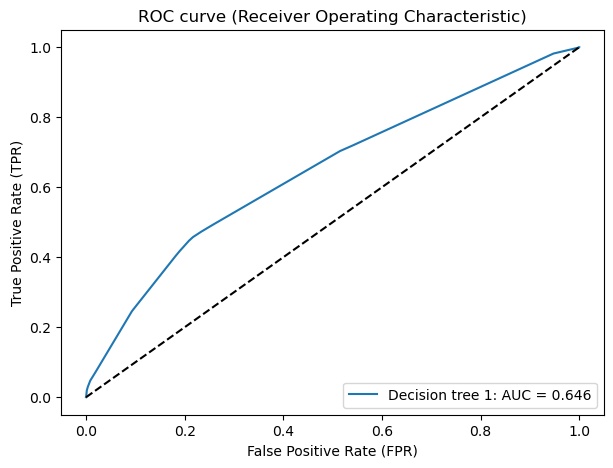

In [36]:
plt.figure(figsize = (7, 5))

for test, pred, name in zip([y_test], [attr_treePredict_probs1[:, 1]], ['Decision tree 1']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = '{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

#### Random forest

In [37]:
RF1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 10, max_leaf_nodes=20 ,max_depth = 5, random_state =0 )
RF1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=10,
                       random_state=0)

In [38]:
y_pred_RF1 = RF1.predict(X_test)
y_predProba_RF1 = RF1.predict_proba(X_test)

Text(0.5, 1.0, 'Accuracy of Random forest: 0.5069264979866579')

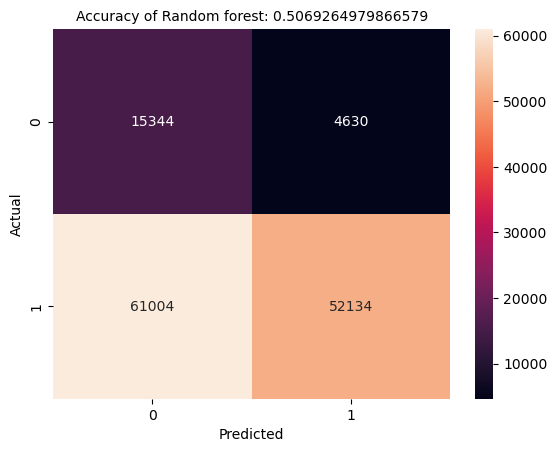

In [39]:
confusion_matrix = pd.crosstab(y_test, y_pred_RF1, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True, fmt = ".0f")
acc_score = accuracy_score(y_test, y_pred_RF1)
all_sample_title = 'Accuracy of Random forest: {0}'.format(acc_score)
plt.title(all_sample_title, size = 10)

#### Logistic regression

In [40]:
logisticRegr1 = LogisticRegression(random_state=0)
logisticRegr1.fit(X_train, y_train)

/opt/software/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [41]:
y_pred_LR1 = logisticRegr1.predict(X_test)
y_pred_probs_LR1 = logisticRegr1.predict_proba(X_test)

Text(0.5, 1.0, 'Accuracy of the Logistic regression: 0.520418895366308')

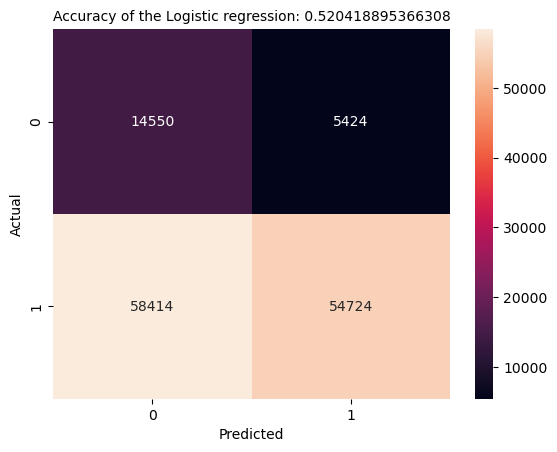

In [42]:
confusion_matrix = pd.crosstab(y_test, y_pred_LR1, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True, fmt = ".0f")
acc_score = accuracy_score(y_test, y_pred_LR1)
all_sample_title = 'Accuracy of the Logistic regression: {0}'.format(acc_score)
plt.title(all_sample_title, size = 10)

In [43]:
fit_logistic = sm.Logit(y_train, X_train).fit()
print(fit_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.662725
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              not_churn   No. Observations:               528010
Model:                          Logit   Df Residuals:                   527999
Method:                           MLE   Df Model:                           10
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                 0.04389
Time:                        16:05:16   Log-Likelihood:            -3.4993e+05
converged:                       True   LL-Null:                   -3.6599e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0281      0.034     -0.83

In [44]:
#Inteprete result

fit_logistic = sm.Logit(y_train, X_train).fit()
collected = []
for i, (col, pval) in enumerate(zip(X_train.columns, fit_logistic.pvalues)):
    if (pval < 0.05):
        collected.append((i, col, pval))
print(f"List of all significant factors affecting product passing test:")
print(f"{'Factor':<30}{'P Value':>12}{'Odds of not churning':>20}")
for i, col, pval in collected:
    value = (exp(fit_logistic.params.iloc[i]) - 1)*100
    value = f"{value:.2f} %"
    print(f"{col:30}{pval:12.2f}{value:>12}")

Optimization terminated successfully.
         Current function value: 0.662725
         Iterations 7
List of all significant factors affecting product passing test:
Factor                             P ValueOdds of not churning
price                                 0.00      0.72 %
discount(y/n)                         0.00     72.86 %
expected_queue_time                   0.00      0.29 %
product_category_Other                0.00   1978.32 %
product_category_Product              0.00     33.76 %
membership_condensated_nonmember        0.00    -45.94 %
membership_condensated_platinum        0.00    129.16 %
membership_condensated_silver         0.00     15.40 %


#### Gradient boosting

In [45]:
DJ1 = GradientBoostingClassifier(n_estimators = 100,  loss = 'exponential',subsample = 0.8,min_samples_leaf = 20, max_leaf_nodes=20 ,max_depth = 20, random_state =12345, learning_rate = 0.2)
DJ1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=20,
                           max_leaf_nodes=20, min_samples_leaf=20,
                           random_state=12345, subsample=0.8)

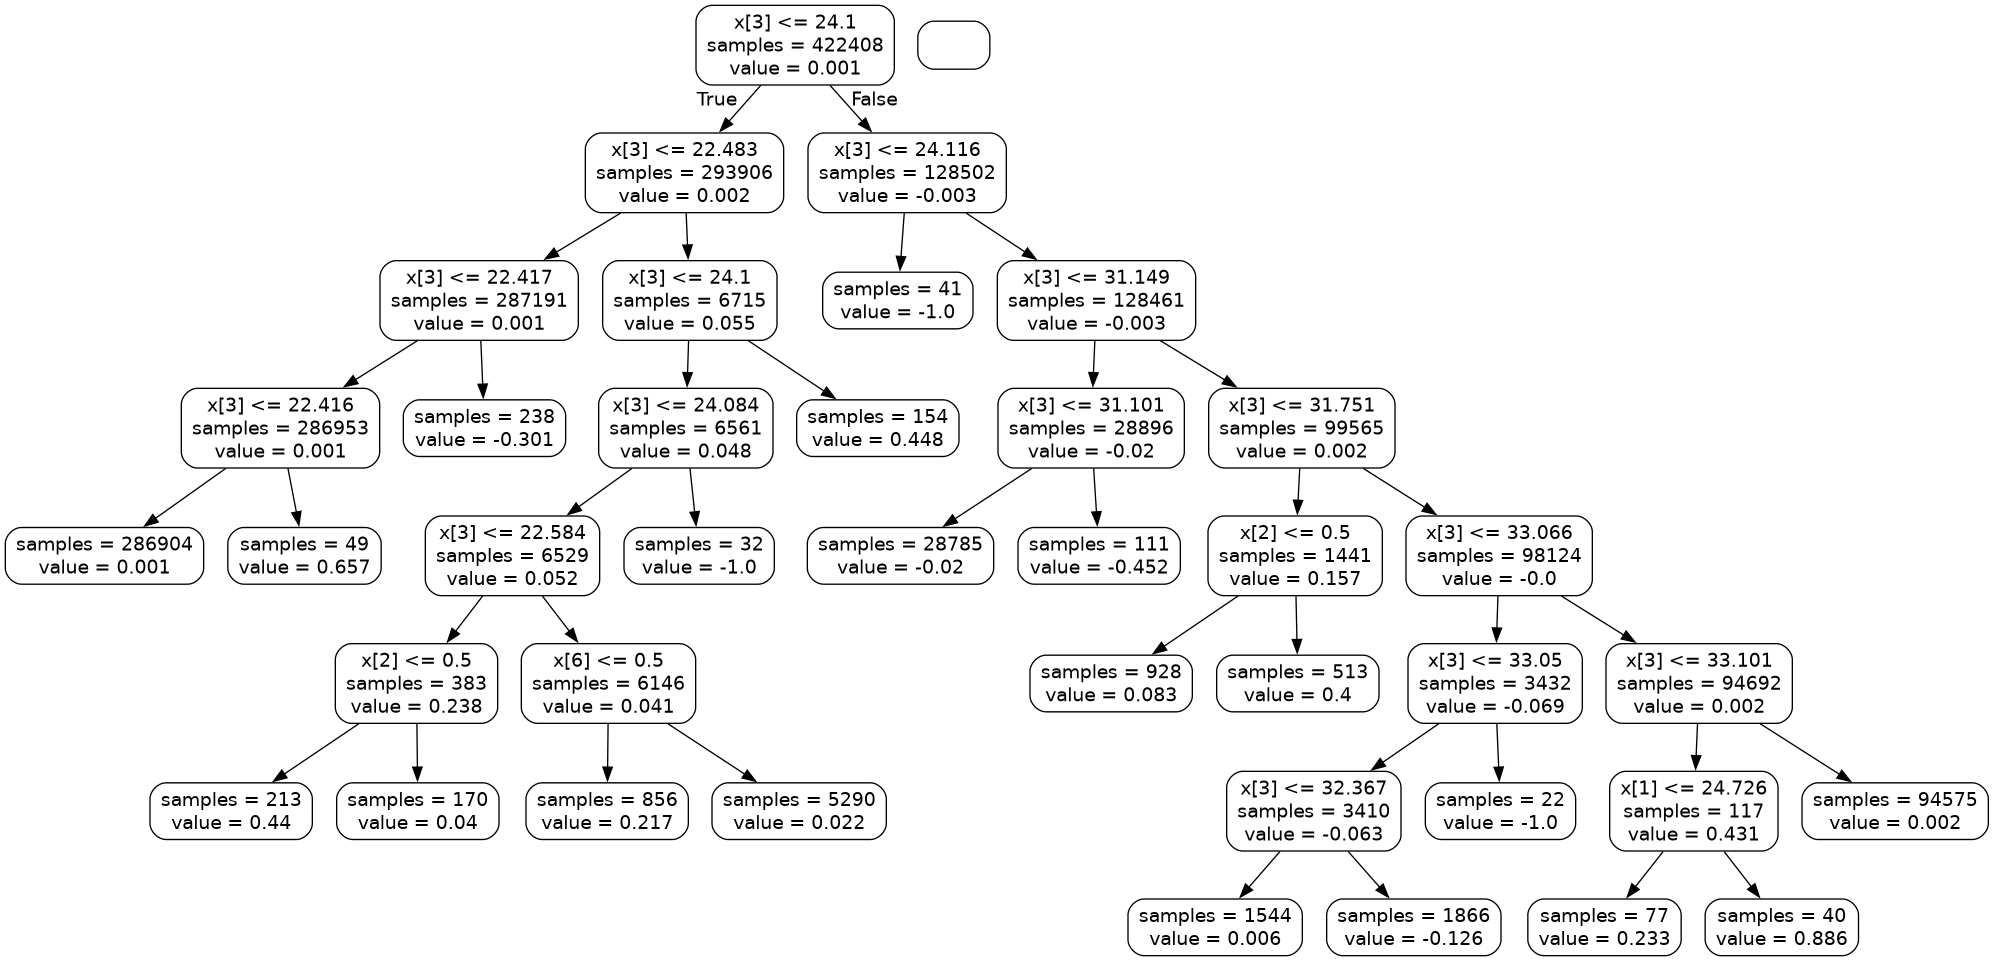

In [46]:
gbc_sub_tree = DJ1.estimators_[99,0]
graph_data = export_graphviz(gbc_sub_tree, out_file=None, rounded=True, proportion=False, impurity=False)
tree_graph = graph_from_dot_data(graph_data)
Image(tree_graph.create_png())

In [47]:
y_pred_DJ1 = DJ1.predict(X_test)
y_predProba_DJ1 = DJ1.predict_proba(X_test)

Text(0.5, 1.0, 'Accuracy of Gradient boosting: 0.5542926257587596')

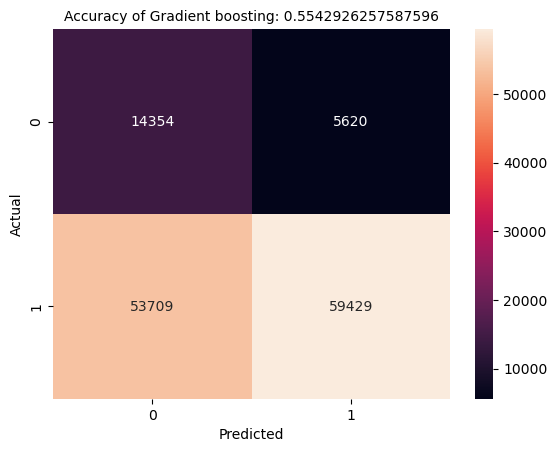

In [48]:
confusion_matrix = pd.crosstab(y_test, y_pred_DJ1, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True, fmt = ".0f")
acc_score = accuracy_score(y_test, y_pred_DJ1)
all_sample_title = 'Accuracy of Gradient boosting: {0}'.format(acc_score)
plt.title(all_sample_title, size = 10)

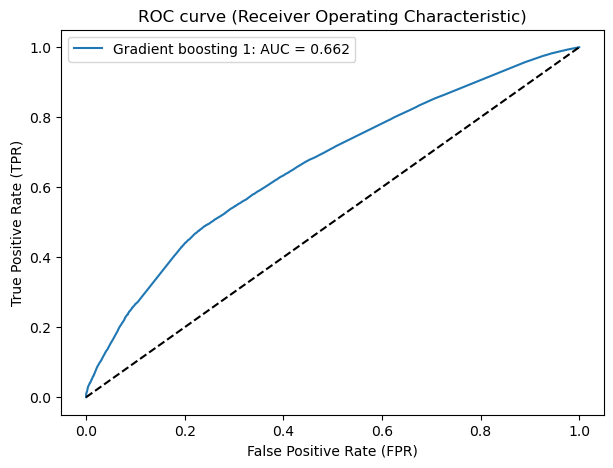

In [49]:
plt.figure(figsize=(7,5))

for test, pred, name in zip([y_test], [y_predProba_DJ1[:, 1]], ['Gradient boosting 1']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = '{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc = 'best')
    plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()